In [1]:
import idx2numpy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.metrics import plot_confusion_matrix
from tabulate import tabulate

In [2]:
Train_Array = idx2numpy.convert_from_file("train-images.idx3-ubyte")
Test_Array = idx2numpy.convert_from_file("train-labels.idx1-ubyte")
Train_Array_Converted = Train_Array.reshape((Train_Array.shape[0],(Train_Array.shape[1] * Train_Array.shape[2])))

In [3]:
# -- Part 1 -- 
# Subset of the database consisting the first 1000 images (image indexes from 0-1000) of handwritten digits for training the 
# system and use another 100 images for testing the system (image indexes from 2000-2100). 

In [4]:
Classifier = svm.SVC(C = 20)

Train Size 1000, Test Size 100 Accuracy: 0.91


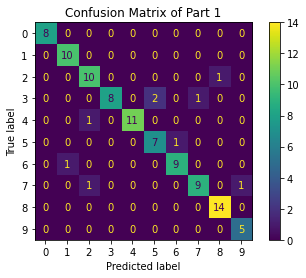

In [5]:
Classifier.fit(Train_Array_Converted[:1000],Test_Array[:1000])
Accuracy_part_1 = accuracy_score(Test_Array[2000:2100], Classifier.predict(Train_Array_Converted[2000:2100]))
print("Train Size 1000, Test Size 100 Accuracy:",Accuracy_part_1)
display_plot = plot_confusion_matrix(Classifier,Train_Array_Converted[2000:2100],Test_Array[2000:2100])
plt.title("Confusion Matrix of Part 1")
plt.show()

In [6]:
# -- Part 2 -- 
# Subset of the database consisting the first 1000 images (image indexes from 0-10000) of handwritten digits for training the 
# system and use another 100 images for testing the system (image indexes from 20000-20100). 

Train Size 10000, Test Size 100 Accuracy: 0.97


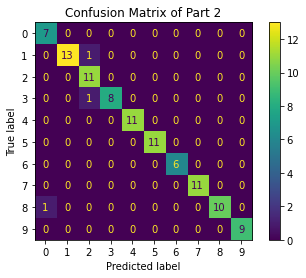

In [7]:
Classifier.fit(Train_Array_Converted[:10000],Test_Array[:10000])
Predicted = Classifier.predict(Train_Array_Converted[20000:20100])
Accuracy_part_2 = accuracy_score(Test_Array[20000:20100], Classifier.predict(Train_Array_Converted[20000:20100]))
print("Train Size 10000, Test Size 100 Accuracy:",Accuracy_part_2)
display_plot = plot_confusion_matrix(Classifier,Train_Array_Converted[20000:20100],Test_Array[20000:20100])
plt.title("Confusion Matrix of Part 2")
plt.show()

In [8]:
# -- Part 3 -- 
# Subset of the database consisting the first 1000 images (image indexes from 0-10000) of handwritten digits for training the 
# system and use another 100 images for testing the system (image indexes from 20000-21000). 

Train Size 10000, Test Size 1000 Accuracy: 0.962


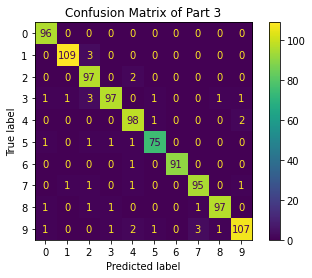

In [9]:
Classifier.fit(Train_Array_Converted[:10000],Test_Array[:10000])
Accuracy_part_3 = accuracy_score(Test_Array[20000:21000], Classifier.predict(Train_Array_Converted[20000:21000]))
print("Train Size 10000, Test Size 1000 Accuracy:",Accuracy_part_3)
display_plot = plot_confusion_matrix(Classifier,Train_Array_Converted[20000:21000],Test_Array[20000:21000])
plt.title("Confusion Matrix of Part 3")
plt.show()

In [10]:
# -- Part 5 -- 
# Repeat the experiment in part 3 for training the SVM classifier with different set of kernel functions.

In [11]:
Classifier1 = svm.SVC(kernel='poly', C = 20)
Classifier1.fit(Train_Array_Converted[:10000],Test_Array[:10000])
Accuracy_part_5 = accuracy_score(Test_Array[20000:21000], Classifier1.predict(Train_Array_Converted[20000:21000]))
print("Train Size 10000, Test Size 1000 Diffrent Kernel Accuracy:",Accuracy_part_5)

Train Size 10000, Test Size 1000 Diffrent Kernel Accuracy: 0.952


In [12]:
# -- Part 6 -- 
# Create binary images of the handwritten digits by a simple thresholding (indicate the threshold value you used) 
# and repeat the experiment in part 3.

In [13]:
# Threshold Value = 0
Final_Arr = np.array([(i > 0) for i in Train_Array_Converted])
Classifier.fit(Final_Arr[:10000],Test_Array[:10000])
Threshold_Value_0 = accuracy_score(Test_Array[20000:21000], Classifier.predict(Final_Arr[20000:21000]))
print("Threshold Value = 0, Accuracy:",Threshold_Value_0)

Threshold Value = 0, Accuracy: 0.956


In [14]:
# Threshold Value = 75
Final_Arr = np.array([(i > 75) for i in Train_Array_Converted])
Classifier.fit(Final_Arr[:10000],Test_Array[:10000])
Threshold_Value_75 = accuracy_score(Test_Array[20000:21000], Classifier.predict(Final_Arr[20000:21000]))
print("Threshold Value = 75, Accuracy:",Threshold_Value_75)

Threshold Value = 75, Accuracy: 0.953


In [15]:
# Threshold Value = 150
Final_Arr = np.array([(i > 150) for i in Train_Array_Converted])
Classifier.fit(Final_Arr[:10000],Test_Array[:10000])
Threshold_Value_150 = accuracy_score(Test_Array[20000:21000], Classifier.predict(Final_Arr[20000:21000]))
print("Threshold Value = 150, Accuracy:",Threshold_Value_150)

Threshold Value = 150, Accuracy: 0.947


In [16]:
# Threshold Value = 215
Final_Arr = np.array([(i > 215) for i in Train_Array_Converted])
Classifier.fit(Final_Arr[:10000],Test_Array[:10000])
Threshold_Value_215 = accuracy_score(Test_Array[20000:21000], Classifier.predict(Final_Arr[20000:21000]))
print("Threshold Value = 215, Accuracy:",Threshold_Value_215)

Threshold Value = 215, Accuracy: 0.93


In [17]:
# -- Part 7 -- 
# Create a comparison table for the accuracy of all parts above. 

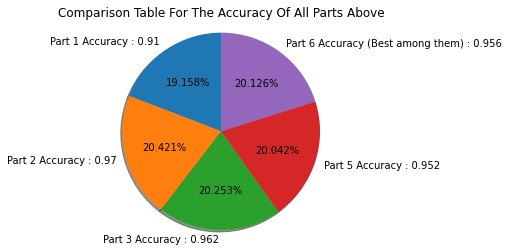

In [18]:
Labels_Plot = (f"Part 1 Accuracy : {Accuracy_part_1}",f"Part 2 Accuracy : {Accuracy_part_2}",f"Part 3 Accuracy : {Accuracy_part_3}",f"Part 5 Accuracy : {Accuracy_part_5}",f"Part 6 Accuracy (Best among them) : {Threshold_Value_0}")
Data = [Accuracy_part_1,Accuracy_part_2,Accuracy_part_3,Accuracy_part_5,Threshold_Value_0]
fig, ax = plt.subplots()
ax.pie(Data, labels=Labels_Plot, autopct='%1.3f%%', shadow=True, startangle=90)
ax.axis('equal')
plt.title('Comparison Table For The Accuracy Of All Parts Above')
plt.show()

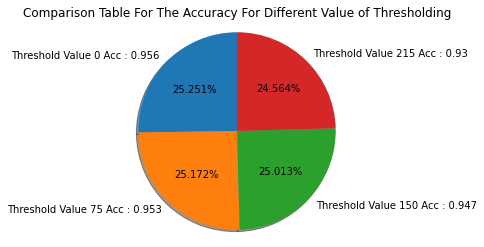

In [19]:
Labels_Plot = (f"Threshold Value 0 Acc : {Threshold_Value_0}",f"Threshold Value 75 Acc : {Threshold_Value_75}",f"Threshold Value 150 Acc : {Threshold_Value_150}",f"Threshold Value 215 Acc : {Threshold_Value_215}")
Data = [Threshold_Value_0,Threshold_Value_75,Threshold_Value_150,Threshold_Value_215]
fig, ax = plt.subplots()
ax.pie(Data, labels=Labels_Plot, autopct='%1.3f%%', shadow=True, startangle=90)
ax.axis('equal')
plt.title('Comparison Table For The Accuracy For Different Value of Thresholding')
plt.show()

In [20]:
df = pd.DataFrame({'Part' : ['Part 1','Part 2','Part 3','Part 5', 'TH Val 0','TH Val 75','TH Val 150','TH Val 215'],
                   'Accuracy' : [Accuracy_part_1,Accuracy_part_2,Accuracy_part_3,Accuracy_part_5,Threshold_Value_0,Threshold_Value_75,Threshold_Value_150,Threshold_Value_215]})
print(tabulate(df, headers='keys', tablefmt='fancy_grid'))

╒════╤════════════╤════════════╕
│    │ Part       │   Accuracy │
╞════╪════════════╪════════════╡
│  0 │ Part 1     │      0.91  │
├────┼────────────┼────────────┤
│  1 │ Part 2     │      0.97  │
├────┼────────────┼────────────┤
│  2 │ Part 3     │      0.962 │
├────┼────────────┼────────────┤
│  3 │ Part 5     │      0.952 │
├────┼────────────┼────────────┤
│  4 │ TH Val 0   │      0.956 │
├────┼────────────┼────────────┤
│  5 │ TH Val 75  │      0.953 │
├────┼────────────┼────────────┤
│  6 │ TH Val 150 │      0.947 │
├────┼────────────┼────────────┤
│  7 │ TH Val 215 │      0.93  │
╘════╧════════════╧════════════╛
